# **Problem Statement**
**Nowadays crude oil is essential commodity in day to day life its difficult to be aware of oil prices in future thats why we have come up with oil price prediction model  our model will predict oil price so that consumers  or bussinesses make effective decisions.**


# **about the dataset**
we have took the dataset from well known company called Brent Oil Pty Ltd from 1987 to 2022 this dataset will include 

1)Date

2)Europe Brent Spot Price FOB (Dollars per Barrel)


**Source**:-On Brent oil dataset-https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=RBRTE&f=M


# Exploratory Data Analysis-EDA


In [ ]:
pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importing pandas library for data handling and manipulation
import pandas as pd 
#importing numpy for scientific calculation 
import numpy as np
#importing pyplot module from matplotlib for data visualization including seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import time
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
#import hmmlearn
#from hmmlearn import hmm
import pandas as pd
import numpy as np

import datetime

from copy import deepcopy

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt

from scipy.stats import boxcox
from scipy.special import inv_boxcox

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams

import seaborn as sns
sns.set()

from tqdm import tqdm

from sklearn.linear_model import LinearRegression

#from hmmlearn.hmm import GaussianHMM

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
dataset = pd.read_csv("/content/data11.csv", parse_dates=['Date'], infer_datetime_format = True)
dataset.rename(columns={'Europe Brent Spot Price FOB (Dollars per Barrel)': 'Price'}, inplace=True)
data=dataset

In [ ]:
#Load the data
df=pd.read_csv('/content/data11.csv')


*step 1:-* **Understanding the data**

Basic information about data-EDA

In [ ]:
# Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9034 entries, 0 to 9033
Data columns (total 2 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Date                                              9034 non-null   object 
 1   Europe Brent Spot Price FOB (Dollars per Barrel)  9034 non-null   float64
dtypes: float64(1), object(1)
memory usage: 141.3+ KB


In [ ]:
df.columns

Index(['Date', 'Europe Brent Spot Price FOB (Dollars per Barrel)'], dtype='object')

In [ ]:
df

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
0,"May 20, 1987",18.63
1,"May 21, 1987",18.45
2,"May 22, 1987",18.55
3,"May 25, 1987",18.60
4,"May 26, 1987",18.63
...,...,...
9029,"Dec 13, 2022",80.14
9030,"Dec 14, 2022",83.33
9031,"Dec 15, 2022",82.34
9032,"Dec 16, 2022",80.20


In [ ]:
#view the data
df.head()

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
0,"May 20, 1987",18.63
1,"May 21, 1987",18.45
2,"May 22, 1987",18.55
3,"May 25, 1987",18.60
4,"May 26, 1987",18.63


In [ ]:
df.tail()

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
9029,"Dec 13, 2022",80.14
9030,"Dec 14, 2022",83.33
9031,"Dec 15, 2022",82.34
9032,"Dec 16, 2022",80.20
9033,"Dec 19, 2022",81.66


In [ ]:
df.shape

(9034, 2)

Now describing the data

In [ ]:
#Describe the data
# Describe the- Descritive Statistics
df.describe()

,Europe Brent Spot Price FOB (Dollars per Barrel)
count,9034.000000
mean,48.513844
std,32.872174
min,9.100000
25%,19.050000
50%,39.030000
75%,70.520000
max,143.950000


In [ ]:
#Datatypes
df.dtypes

Date                                                 object
Europe Brent Spot Price FOB (Dollars per Barrel)    float64
dtype: object

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9029,2022-12-13,80.14
9030,2022-12-14,83.33
9031,2022-12-15,82.34
9032,2022-12-16,80.20


 *step 2:-* **cleaning the data**
 
 checking Duplicate Values / Null Values

In [ ]:
#Find null values
df.isnull().sum()

Date                                                0
Europe Brent Spot Price FOB (Dollars per Barrel)    0
dtype: int64

We can use the df.duplicate.sum() function to the sum of duplicate value present if any.It will show the number of duplicate values if they are present in the data.

In [ ]:
#Find the duplicates
df.duplicated().sum()

0

Well,the function returned '0'.This means, there is not a single duplicate value present in our dataset and it is very good thing to know.

**Feature engineering**

In [ ]:
df=df.rename({'Europe Brent Spot Price FOB (Dollars per Barrel)':'DPB'},axis=1) #rename columns 

In [ ]:
df['Date']=pd.to_datetime(df['Date']) #change date formate
df.dtypes 

Date    datetime64[ns]
DPB            float64
dtype: object

In [ ]:
df.Date = pd.to_datetime(df.Date) #change date column object to datetime

In [ ]:
df2=df
df.dtypes

Date    datetime64[ns]
DPB            float64
dtype: object

# Visualization

# 1 Line Plot

In [ ]:
df_eda=df.copy()
df_eda.set_index('Date',inplace=True)

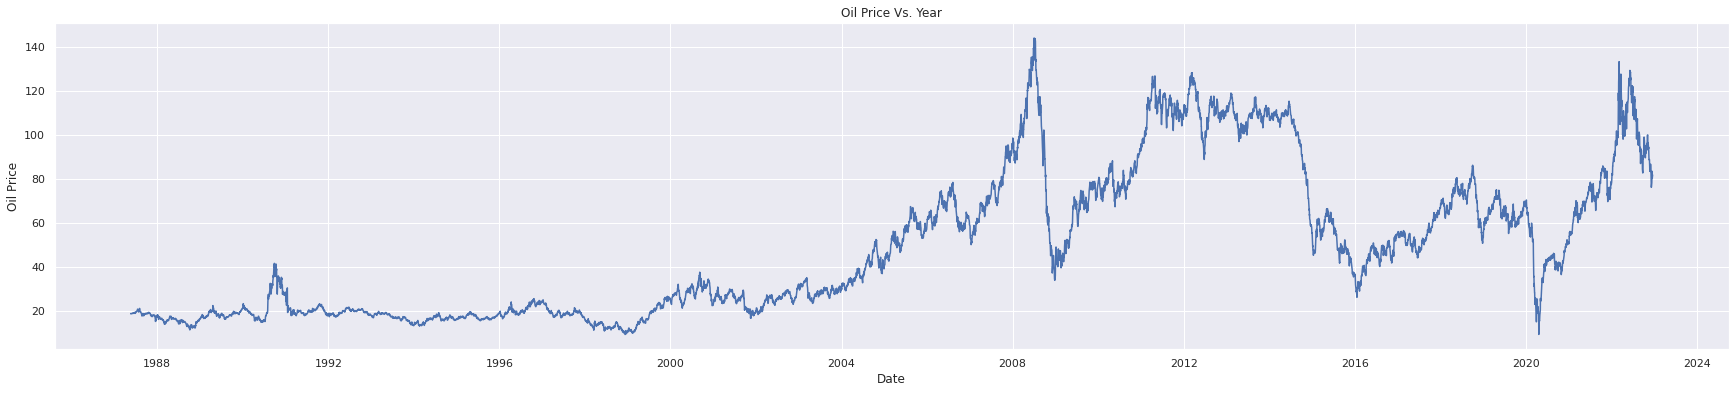

In [ ]:
#Line plot
plt.figure(figsize=(30,6))
sns.lineplot(y='DPB',x='Date',data=df);
plt.title('Oil Price Vs. Year');
plt.xlabel('Date');
plt.ylabel('Oil Price');

# **Line through different phases**

**LINE PLOT(1987-1993)**

In [ ]:
df

,Date,DPB
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9029,2022-12-13,80.14
9030,2022-12-14,83.33
9031,2022-12-15,82.34
9032,2022-12-16,80.20


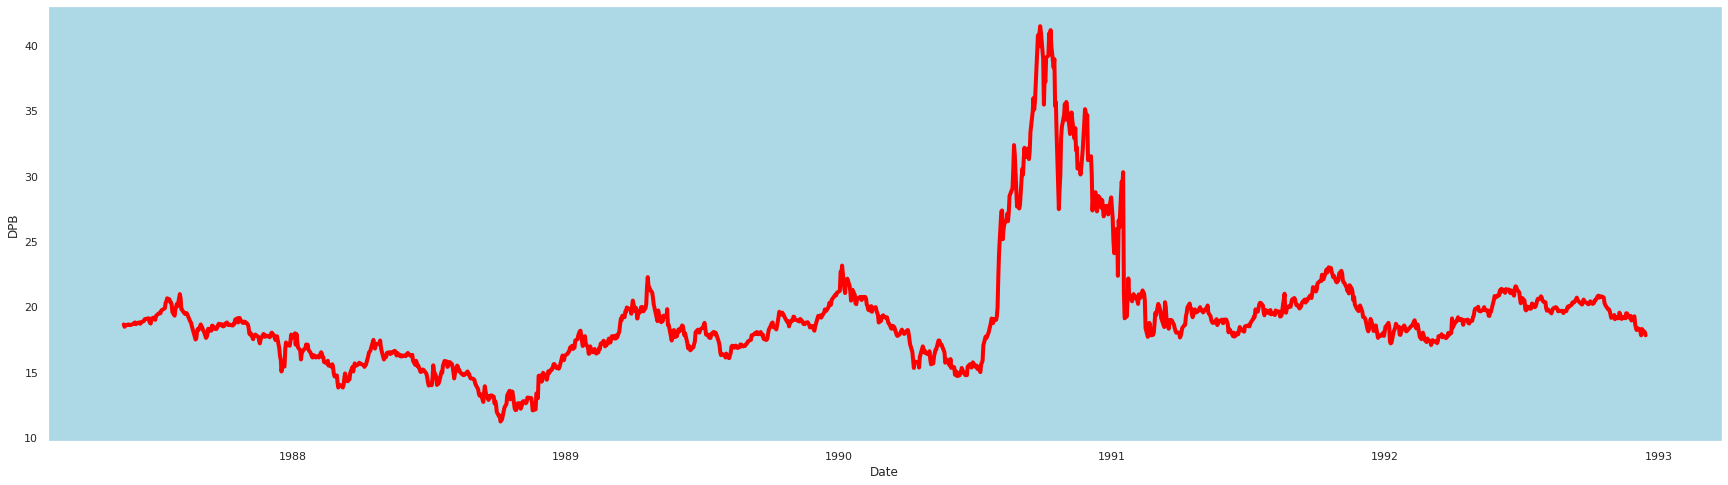

In [ ]:
# Select the subset of data between 1945 and 1950
plt.figure(figsize=(30,8))
b1=df1 = df[df['Date'].between('1987-05-20', '1992-12-15')]
ax = plt.axes()
ax.set_facecolor("lightblue")
plt.grid()
# Plot the time series in your DataFrame as a blue area chart
sns.lineplot(y='DPB',x='Date',color='red',linewidth=4.0,data=df1)


**LINE PLOT(1993-2000)**

In [ ]:
df100=df

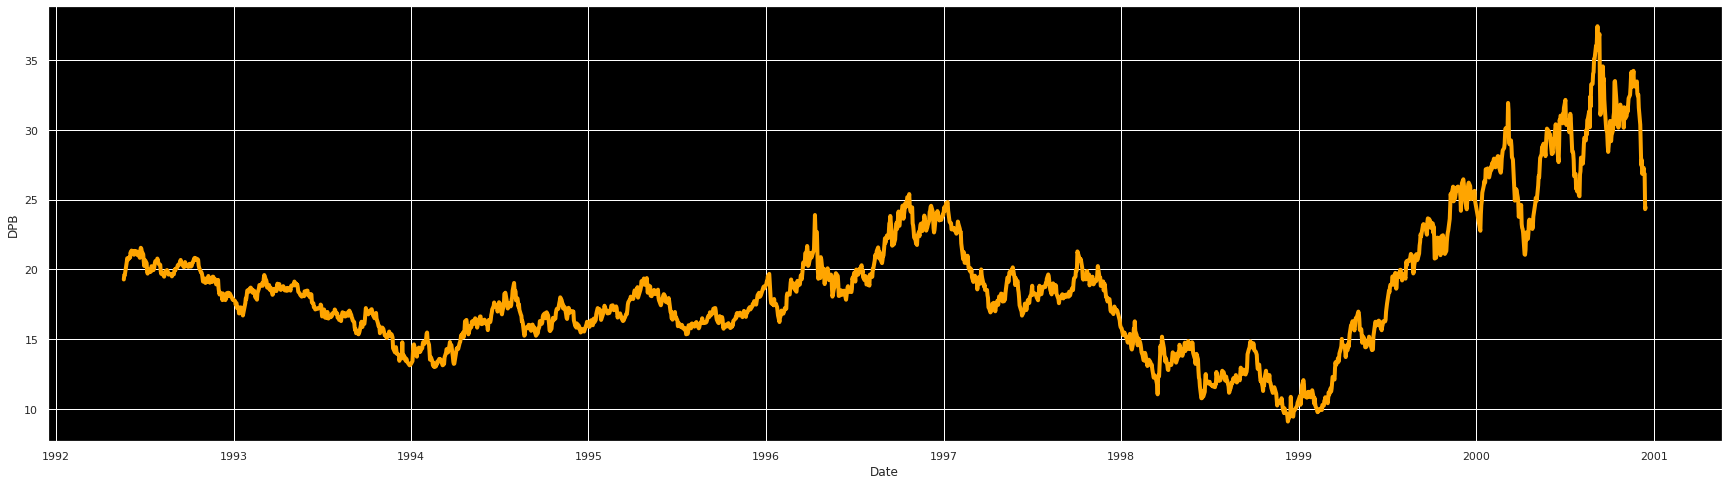

In [ ]:
# Select the subset of data between 1945 and 1950
plt.figure(figsize=(30,8))
b2=df1 = df[df['Date'].between('1992-05-20', '2000-12-15')]
ax = plt.axes()
ax.set_facecolor("black")
# Plot the time series in your DataFrame as a blue area chart
sns.lineplot(y='DPB',x='Date',color='orange',linewidth=4.0,data=df1)

**LINE PLOT(2000-2006)**

In [ ]:
dfa=df

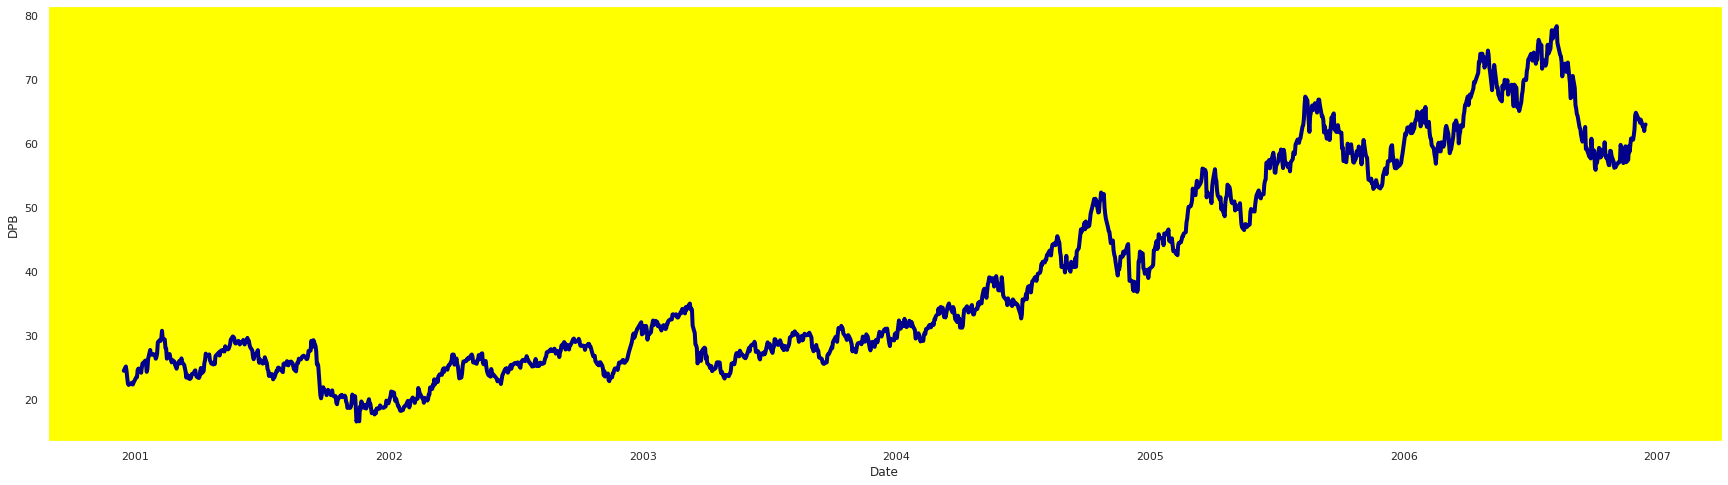

In [ ]:
# Select the subset of data between 1945 and 1950
plt.figure(figsize=(30,8))
b3=df1 = df[df['Date'].between('2000-12-15', '2006-12-15')]
ax = plt.axes()
ax.set_facecolor("yellow")
plt.grid()
# Plot the time series in your DataFrame as a blue area chart
sns.lineplot(y='DPB',x='Date',color='darkblue',linewidth=4.0,data=df1)

**LINE PLOT(2007-2009)Recession phase**

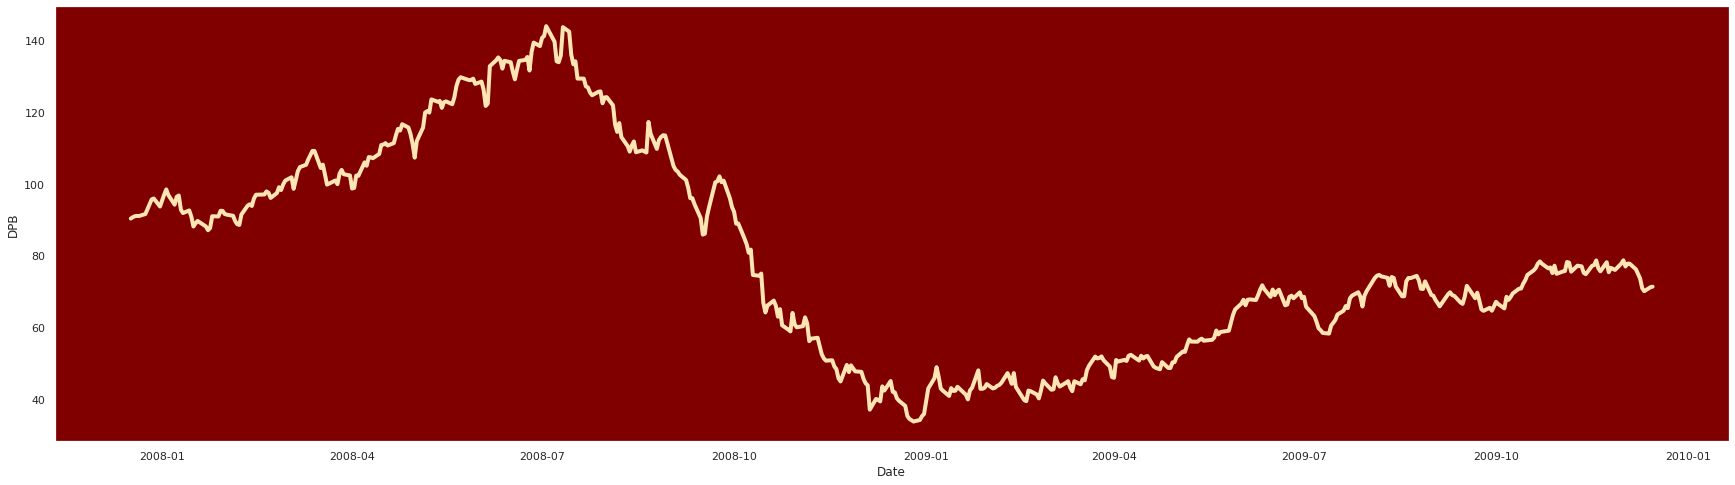

In [ ]:
# Select the subset of data between 1945 and 1950
plt.figure(figsize=(30,8))
b4=df1 = df[df['Date'].between('2007-12-15', '2009-12-15')]
ax = plt.axes()
ax.set_facecolor("maroon")
plt.grid()
# Plot the time series in your DataFrame as a blue area chart
sns.lineplot(y='DPB',x='Date',color='#FFE5B4',linewidth=4.0,data=df1)

**LINE PLOT(2017-2022)Pandemic phase**

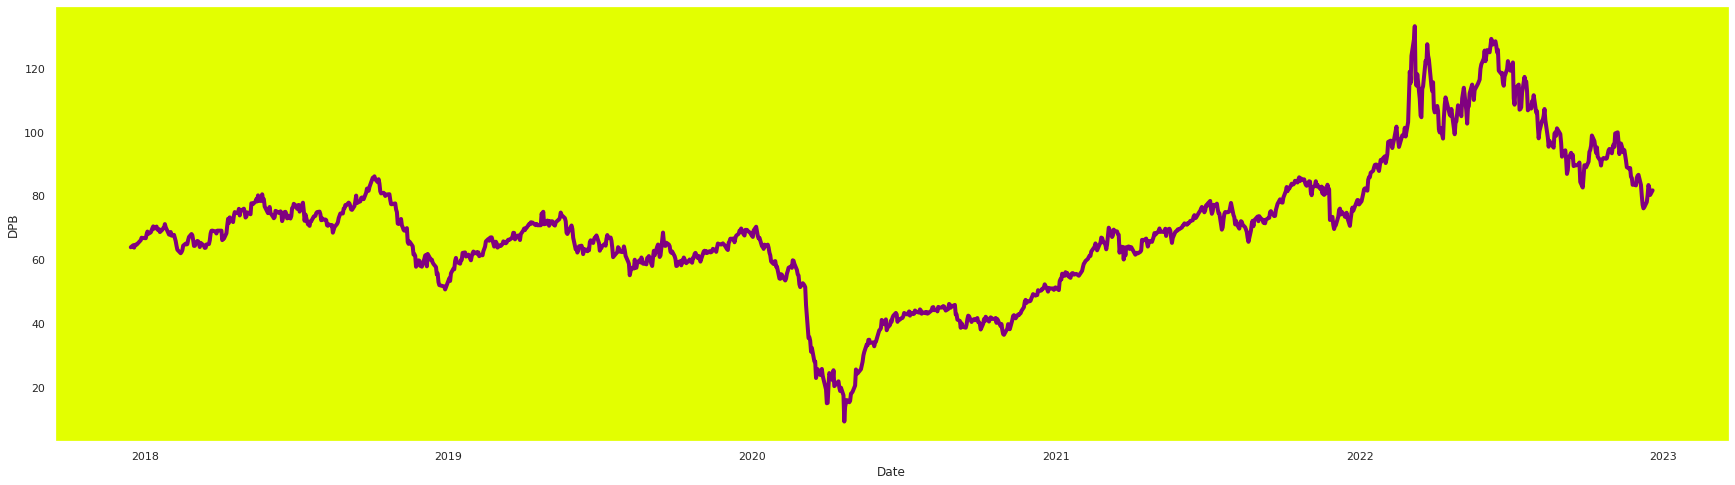

In [ ]:
# Select the subset of data between 1945 and 1950
plt.figure(figsize=(30,8))
b5=df1 = df[df['Date'].between('2017-12-15', '2022-12-19')]
ax = plt.axes()
ax.set_facecolor("#e3ff00")
plt.grid()
# Plot the time series in your DataFrame as a blue area chart
sns.lineplot(y='DPB',x='Date',color='purple',linewidth=4.0,data=df1)

# 2 Histogram

(array([3075., 1347.,  782.,  994., 1013.,  459.,  358.,  793.,  184.,
          29.]),
 array([  9.1  ,  22.585,  36.07 ,  49.555,  63.04 ,  76.525,  90.01 ,
        103.495, 116.98 , 130.465, 143.95 ]),
 <a list of 10 Patch objects>)

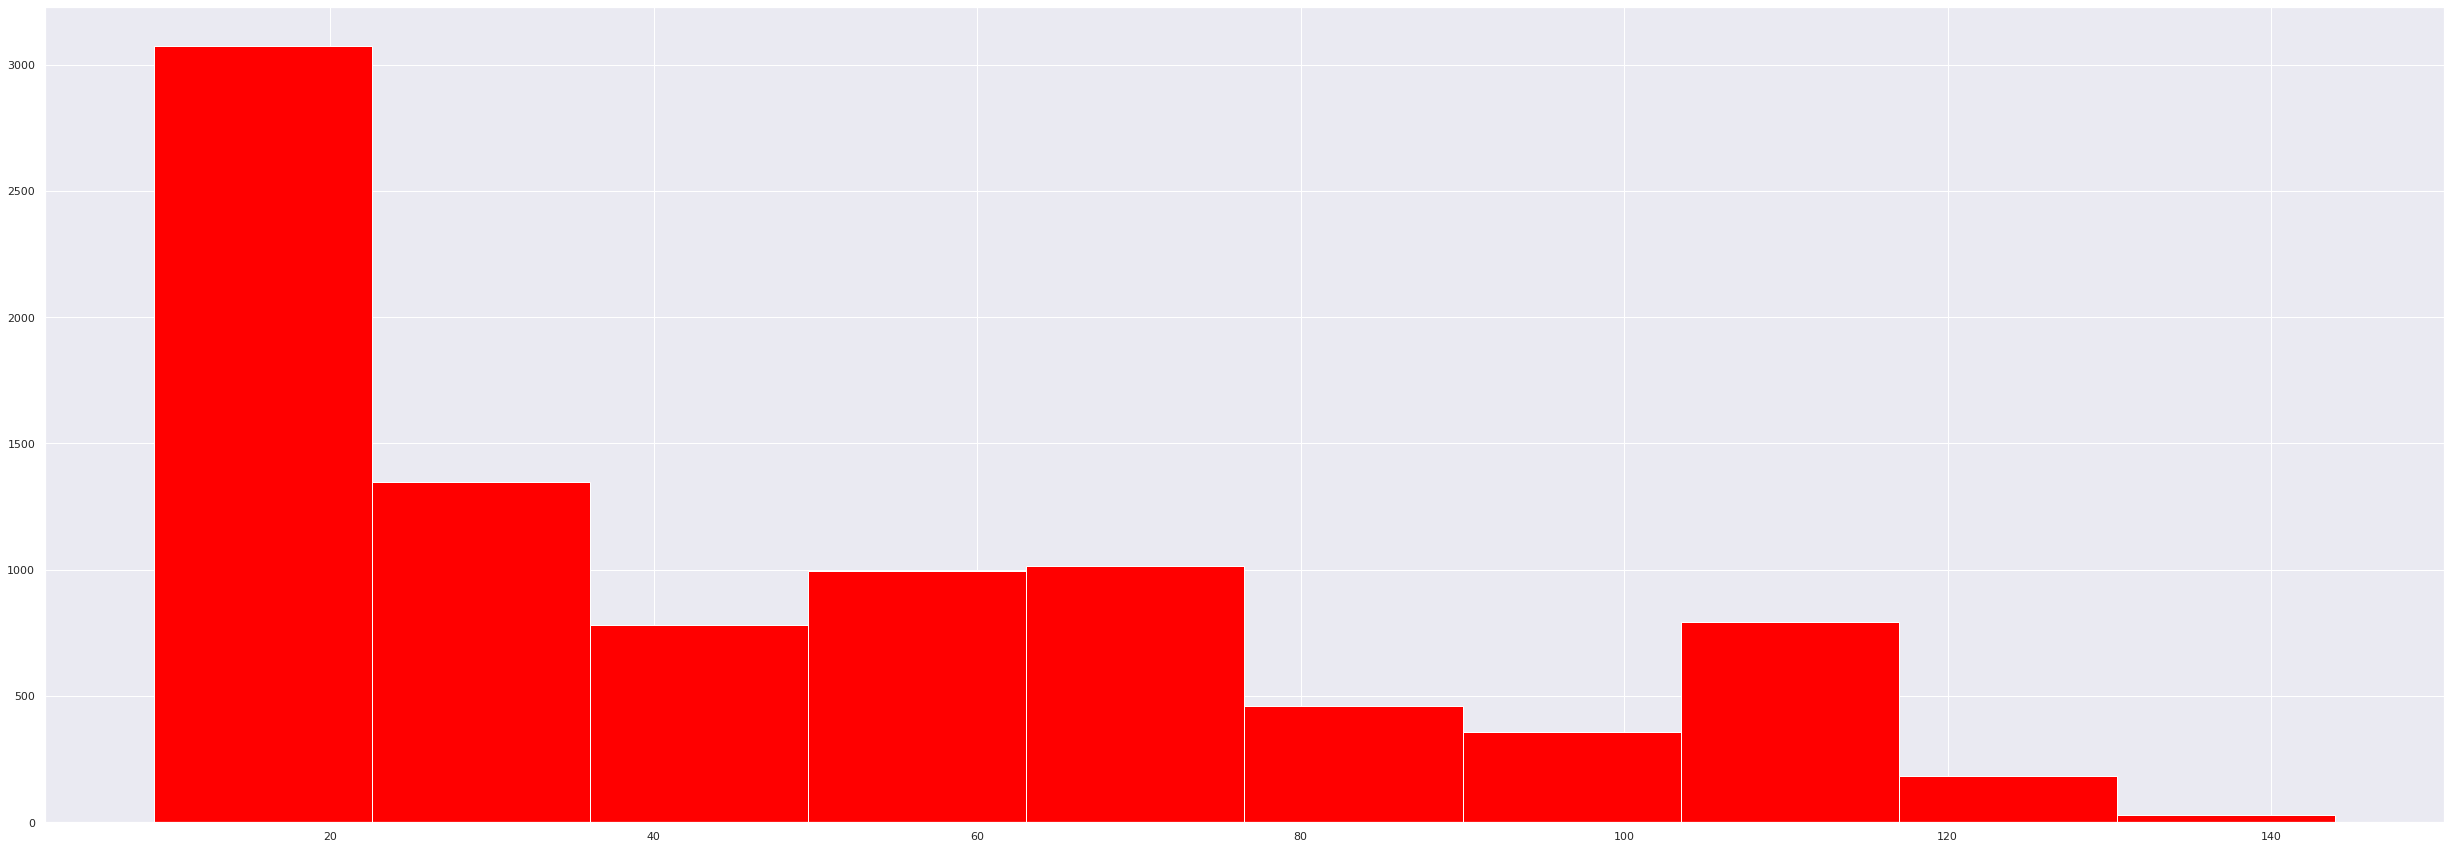

In [ ]:
plt.figure(figsize=(43,15))
plt.hist(df['DPB'],color='red')


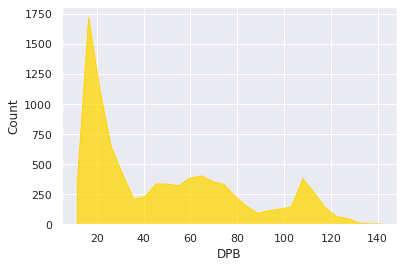

In [ ]:
sns.histplot(df, x="DPB",element="poly",color="#FFD700")
sns.set(rc={'figure.figsize':(21,13)})

[Text(0.5, 1.0, '(2017-2022)Pandemic phase')]

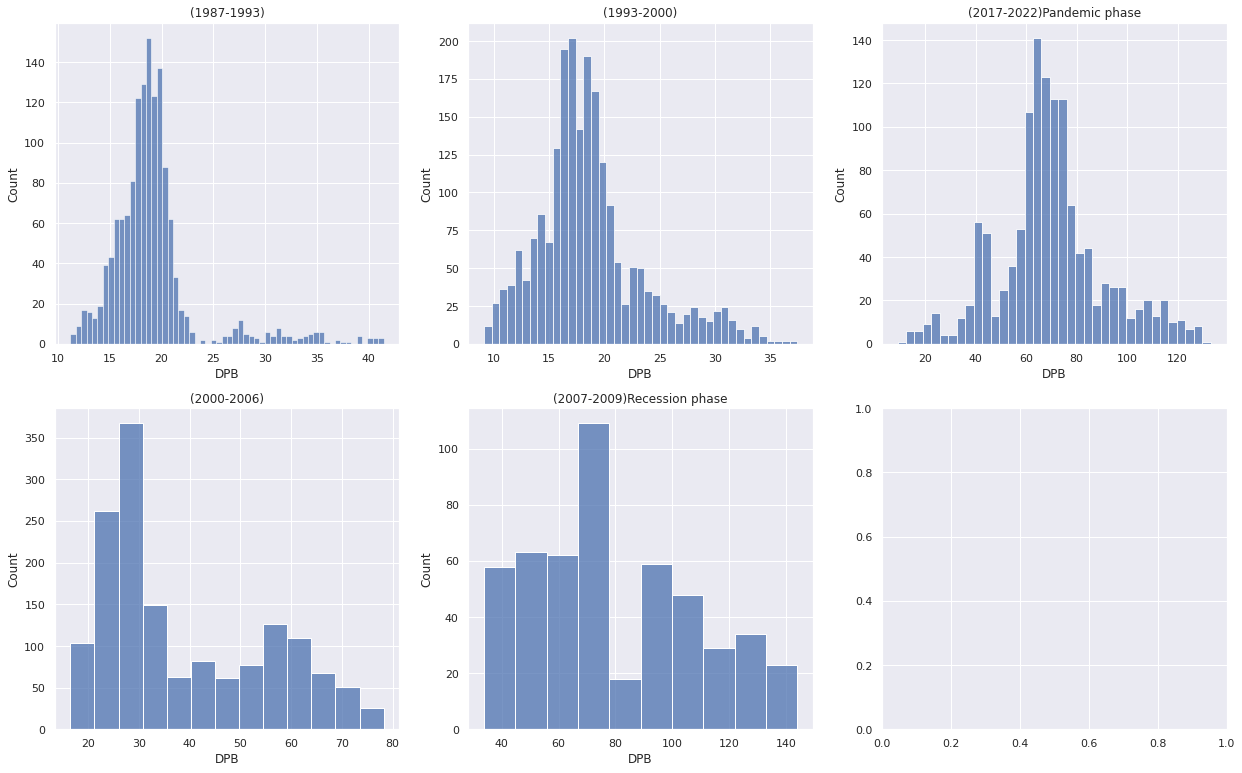

In [ ]:
sns.set()
fig, axes = plt.subplots(2, 3)
sns.histplot(data=b1, x="DPB", ax=axes[0,0]).set(
    title="(1987-1993)")
sns.histplot(data=b2, x="DPB", ax=axes[0,1]).set(
    title="(1993-2000)")
sns.histplot(data=b3, x="DPB", ax=axes[1,0]).set(
    title="(2000-2006)")
sns.histplot(data=b4, x="DPB", ax=axes[1,1]).set(
    title="(2007-2009)Recession phase")
sns.histplot(data=b5, x="DPB", ax=axes[0,2]).set(
    title="(2017-2022)Pandemic phase")

From above visual trend we can see that the data is right skewed and tha data has different trend at different levels  hence it is Non-Stationary.

In [ ]:
df10=df

# 5.3 ANAMOLY DETECTION AND TREATMENT

**ATTEMPT1:-firstly lets visualize**



we need to remove the trend in order visulize

# 5.4 Time Series Decomposition:

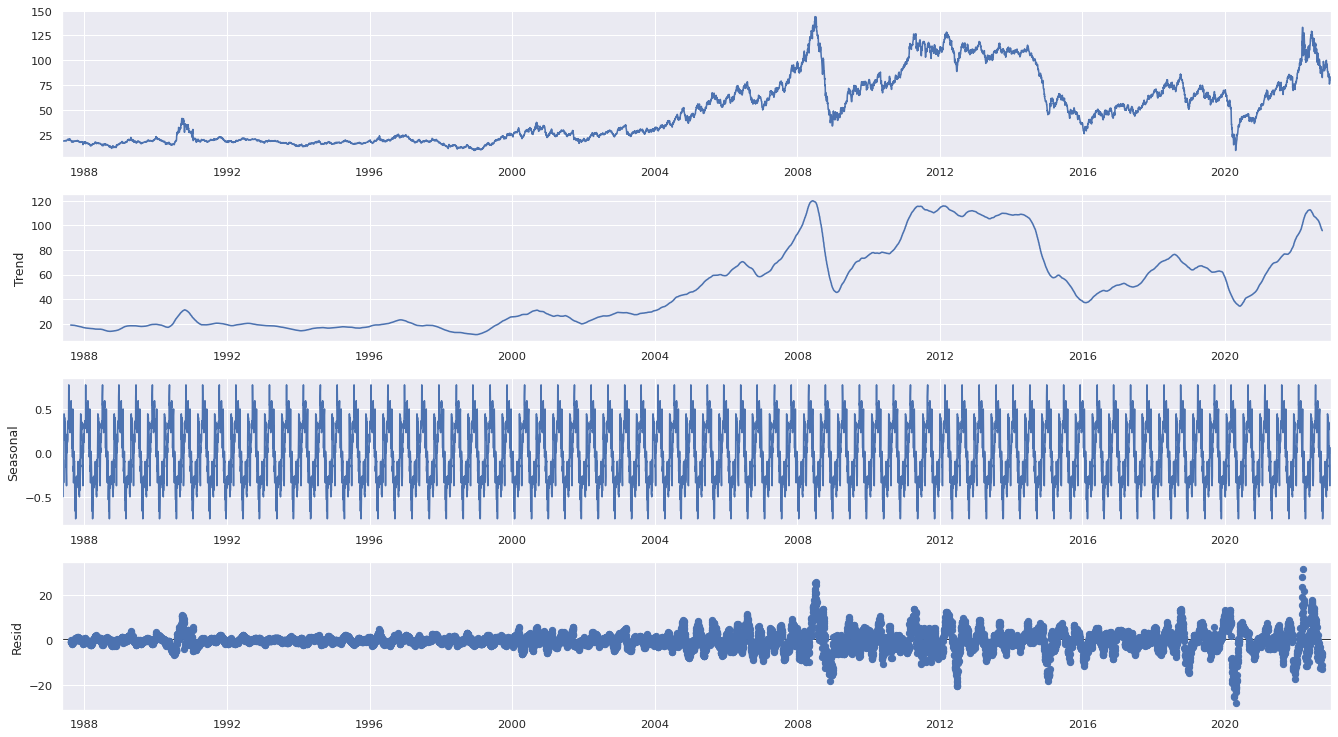

In [ ]:
plt.rcParams.update({'figure.figsize':(18,10), 'figure.dpi':75})
result = seasonal_decompose(df_eda, model='additive', period=120)
result.plot()
plt.show()


-Trend- Slow moving chnages in a time series,Responsible for making series gradually increase or decrease over time.

-Seasonality-Seasonal Patterns in the series.The cycles occur repeatedly over a fixed period of time.

-Residuals- The behaviour of the time series that cannot be explained by the trend and seasonality components.Also called random errors/white noise.

# 5.5 Trend

Visualizing changes in mean over 365 days.

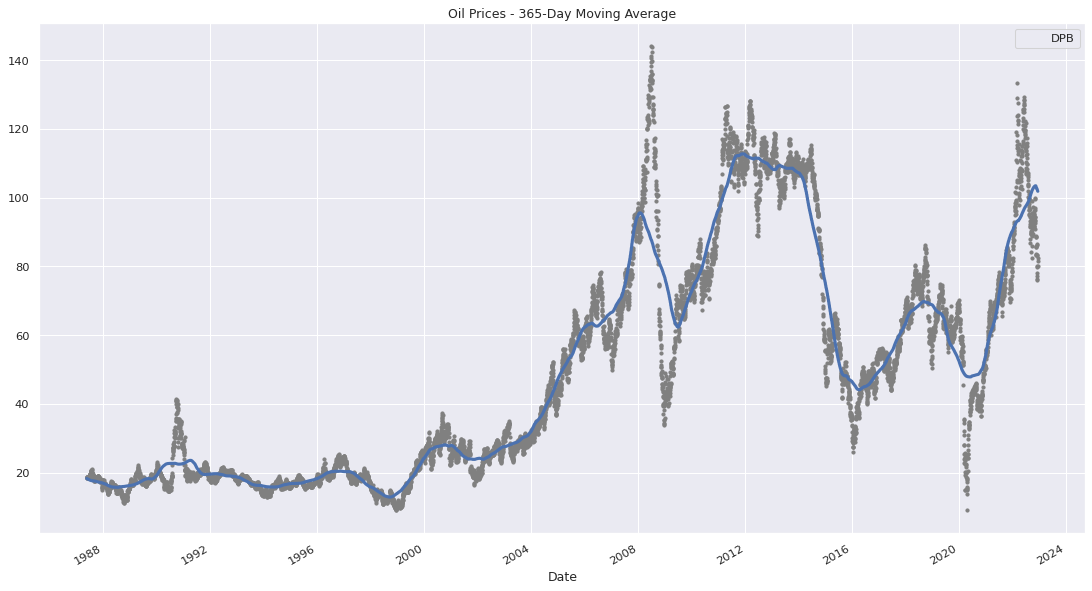

In [ ]:
moving_average = df_eda.rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=183,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = df_eda.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Oil Prices - 365-Day Moving Average", legend=False,
);

From the above plot, we can see that there is no constant direction of the mean(increase/decrease) which is understandable as there might be many external factors involved in price fluctuation.

# 4.6 Displot

To check Normality in the Data

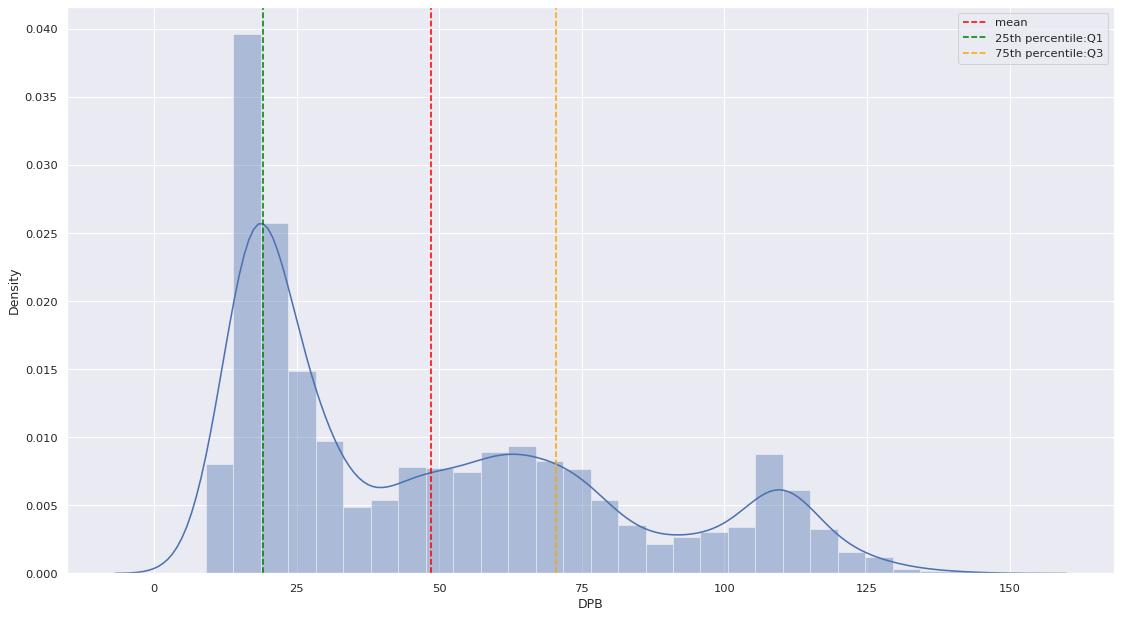

In [ ]:
sns.distplot(df['DPB'])
plt.axvline(x=np.mean(df['DPB']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['DPB'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df['DPB'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

We can see from above's Distplot Data is not normally distributed.

# 5.7 Scatter Plot

<Figure size 3000x750 with 0 Axes>

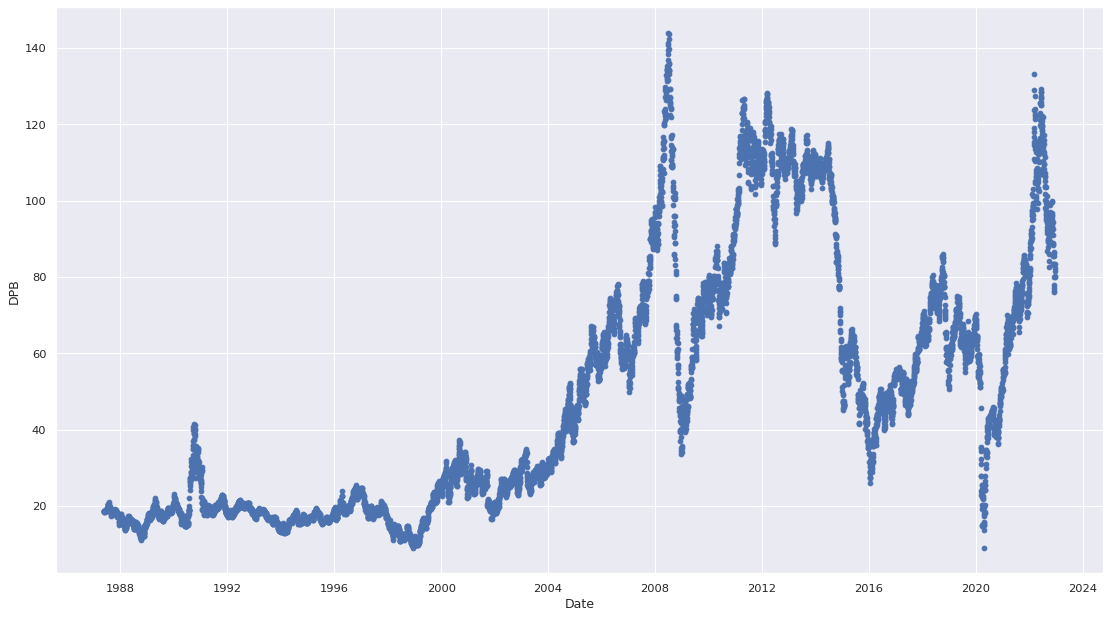

In [ ]:
plt.figure(figsize=(40,10))
df.plot(kind='scatter',x='Date',y='DPB')
plt.show()


In [ ]:
Date=pd.date_range(start='1987-05-20	',end='2022-12-19',freq='M')

# 5.8 Let visualizing the sum of all sales each year. We can do that using group of "Price" and "Date" and group by "Year".

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['weekday'] = df['Date'].dt.weekday
df['weekday'] = np.where(df.weekday == 0, 5, df.weekday)
df_year = df[['DPB','year']].groupby(by='year').sum().reset_index()

df_year

,year,DPB
0,1987,2964.13
1,1988,3800.88
2,1989,4629.97
3,1990,6082.93
4,1991,5150.57
5,1992,4965.17
6,1993,4287.38
7,1994,3995.81
8,1995,4305.01
9,1996,5242.51


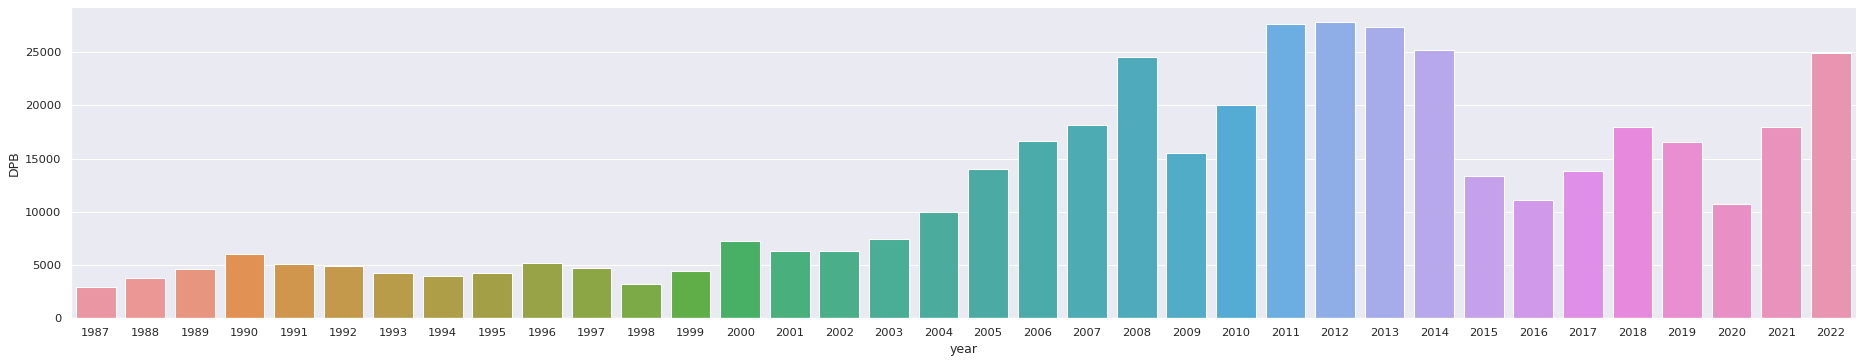

In [ ]:
sns.catplot(x='year',y='DPB',data=df_year,kind='bar',aspect=5)

# Pie Chart

([<matplotlib.patches.Wedge at 0x7fa8aa936eb0>,
 [Text(1.0997517157917256, 0.02337014362720058, '1987'),
  Text(1.09732610836943, 0.07665123541602006, '1988'),
  Text(1.090693448066009, 0.14278586185571832, '1989'),
  Text(1.076525264543041, 0.2260383923154118, '1990'),
  Text(1.0548554949525717, 0.31189723430701527, '1991'),
  Text(1.0294875452565306, 0.3874988956909204, '1992'),
  Text(1.0015428002173903, 0.4548758284770785, '1993'),
  Text(0.9727856488890999, 0.5135056779777736, '1994'),
  Text(0.9405280038494588, 0.5704446283163273, '1995'),
  Text(0.8993169005188032, 0.6334264854276724, '1996'),
  Text(0.8517344075646143, 0.6960951795340603, '1997'),
  Text(0.8106162445322695, 0.7435733347158167, '1998'),
  Text(0.7684445782674485, 0.7870787318504824, '1999'),
  Text(0.6997587092273184, 0.8487271345141014, '2000'),
  Text(0.6142449992003305, 0.9125256604377688, '2001'),
  Text(0.5290321588967889, 0.96442987036539, '2002'),
  Text(0.4310784513549636, 1.0120135220328859, '2003'),
  

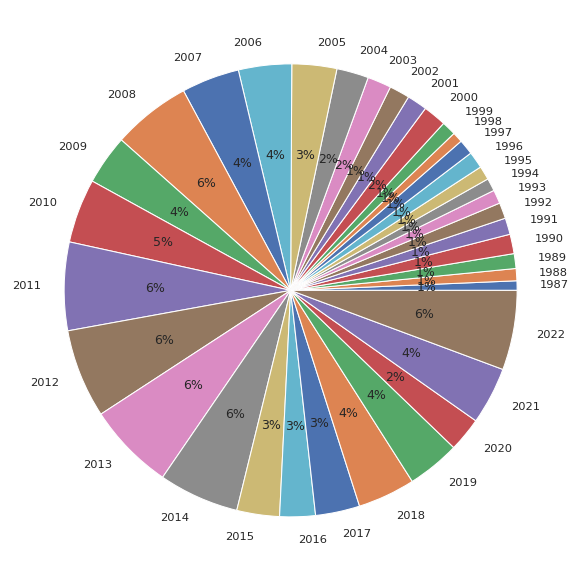

In [ ]:
plt.pie(data=df_year,x=df_year['DPB'],labels=df_year['year'],autopct='%.0f%%')

# Monthly & Yearly Oil Price (Trend & Seasonality) 

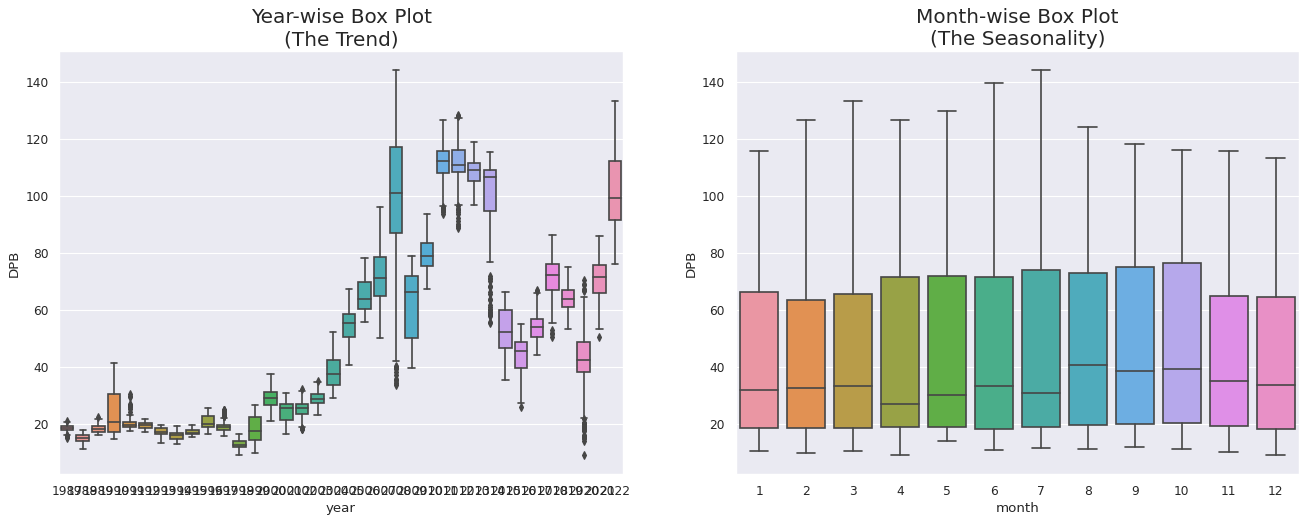

In [ ]:
# Draw plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='DPB', data=df, ax=axes[0])
sns.boxplot(x='month', y='DPB', data=df.loc[~df.year.isin([2016, 2021]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

# Weekly Oil Price

# 1. Weekly Box Plot

[Text(0.5, 1.0, 'Weekly Oil Price')]

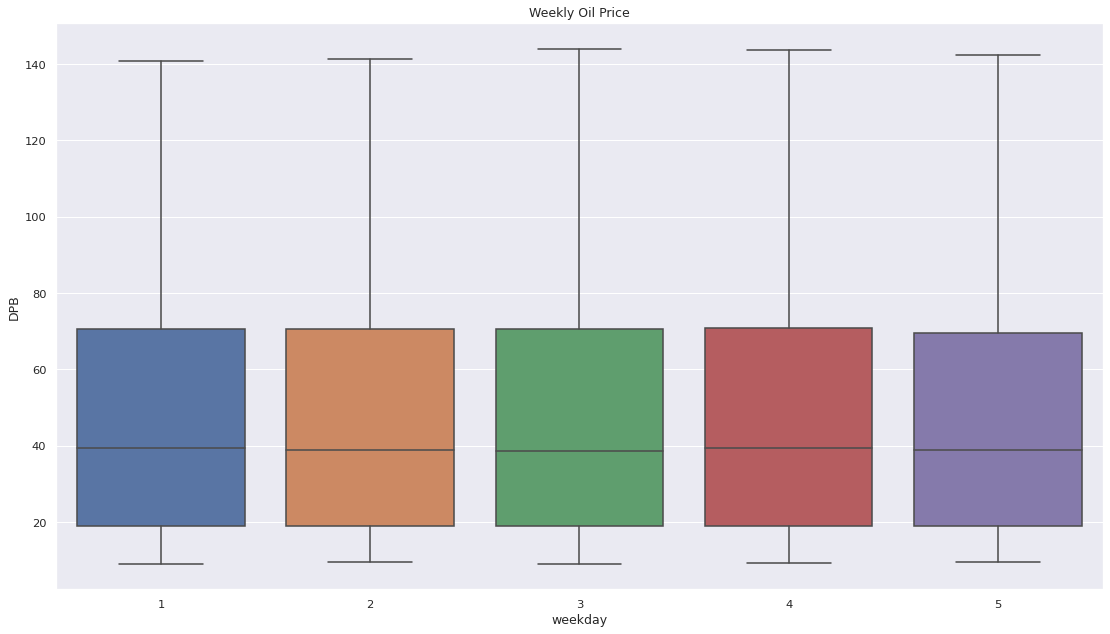

In [ ]:
plot=sns.boxplot(x='weekday',y='DPB',data=df)
plot.set(title='Weekly Oil Price')

# 2.Weekly Violinplot

[Text(0.5, 1.0, 'Weekly Oil-- Price')]

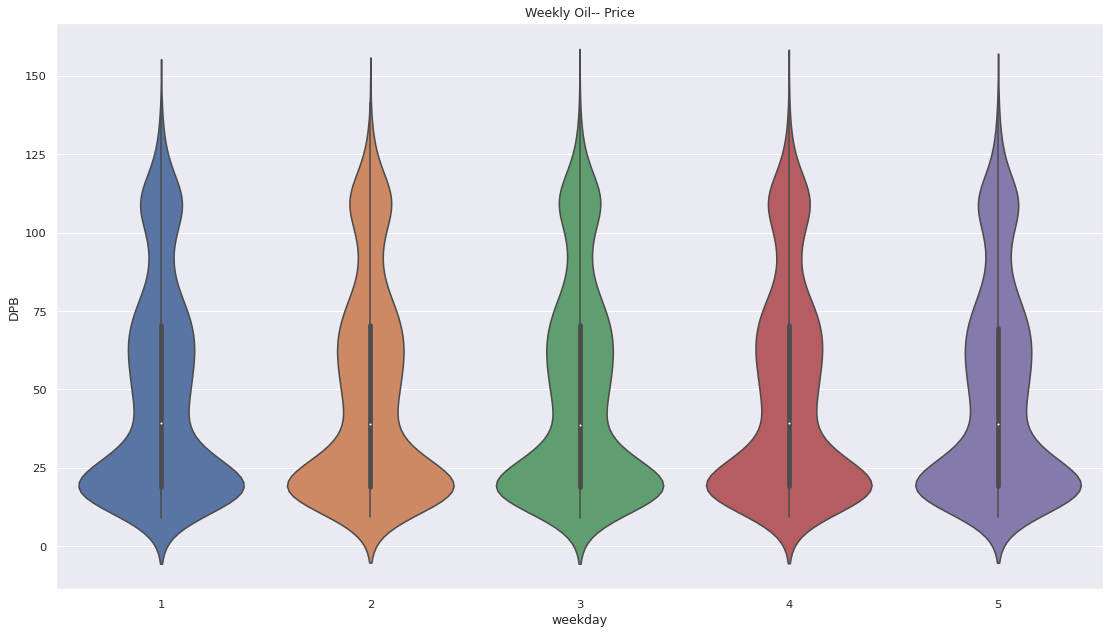

In [ ]:
plot1 = sns.violinplot(x='weekday', y='DPB', data=df)
plot1.set(title='Weekly Oil-- Price')

# 8. Correlation Plot- EDA

Finally, to find the correaltion among the variables, we can make use of the correlation function. This will give you a fair idea of the correlation strength between different variables.

In [ ]:
df.corr()

,DPB,year,month,day,weekday
DPB,1.000000,0.721456,0.004722,-0.001311,-0.001657
year,0.721456,1.000000,-0.022365,-0.004213,-0.001515
month,0.004722,-0.022365,1.000000,-0.012698,0.011067
day,-0.001311,-0.004213,-0.012698,1.000000,-0.000314
weekday,-0.001657,-0.001515,0.011067,-0.000314,1.000000


This is the correlation matrix with the range from +1 to -1 where +1 is highly and positively correlated and -1 will be highly negatively correlated.

<function matplotlib.pyplot.show(*args, **kw)>

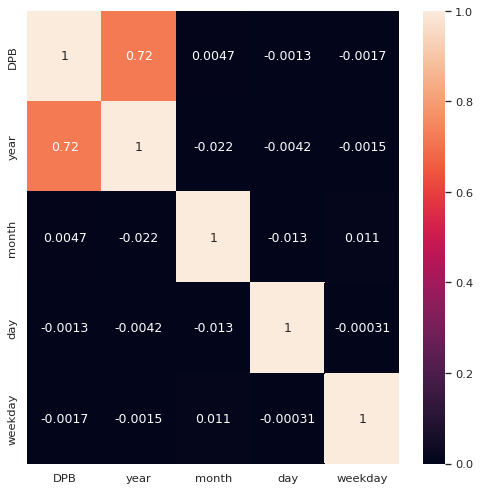

In [ ]:
# Correlation plot

corr_matrix=df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(data=corr_matrix,annot=True,vmin=0)
plt.show

## Anamoly detection and treatment

In [ ]:
# Compute the first and third quartiles of the DPB column
q1, q3 = dfa['DPB'].quantile([0.25, 0.75])

# Compute the IQR
iqr = q3 - q1

# Set the lower and upper bounds for detecting anomalies
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Find the rows with DPB values that are outside the bounds
anomalies = dfa[(dfa['DPB'] < lower_bound) | (dfa['DPB'] > upper_bound)]

# Print the anomalous rows
print(anomalies)

Empty DataFrame
Columns: [Date, DPB, year, month, day, weekday]
Index: []


No anomalous values in data

# Time series decomposition

In [ ]:
df.drop(columns=['month', 'year','day','weekday'], axis=1, inplace=True)

In [ ]:
np.random.seed(100)

#White Noise
wn = np.random.normal(loc = 0,                    # setting the mean value of the white noise to zero
                      scale = df2['DPB'].std(),   # setting the standard deviation of the white noise to 
                                                  # that of the Opening price 
                      size = len(df2))

#Non-stationary series

rw = []              #Pure Random Walk
rw_drift = []        #Random Walk with drift 
Dtrnd = []           #Deterministic trend
rw_drift_Dtrnd = []  #Random Walk with drift+trend

alpha = 100          #setting the drift value
beta = df2['DPB'].values  #trend

yt = df2['DPB'][0]   #Initializing the first value equal to the initial Opening Price

for i in range(len(df2)):
    rw.append( yt + 0.1*wn[i])                                # y(t) = y(t-1) + e
    rw_drift.append( alpha + yt + 0.1*wn[i])                  # y(t) = alpha + y(t-1) + e
    Dtrnd.append( alpha + beta[i]  + 0.1*wn[i])               # y(t) = alpha + beta(t) + e
    rw_drift_Dtrnd.append( alpha + beta[i] + yt + 0.1*wn[i])  # y(t) = alpha + beta(t) + y(t-1) + e
    yt = rw[i]

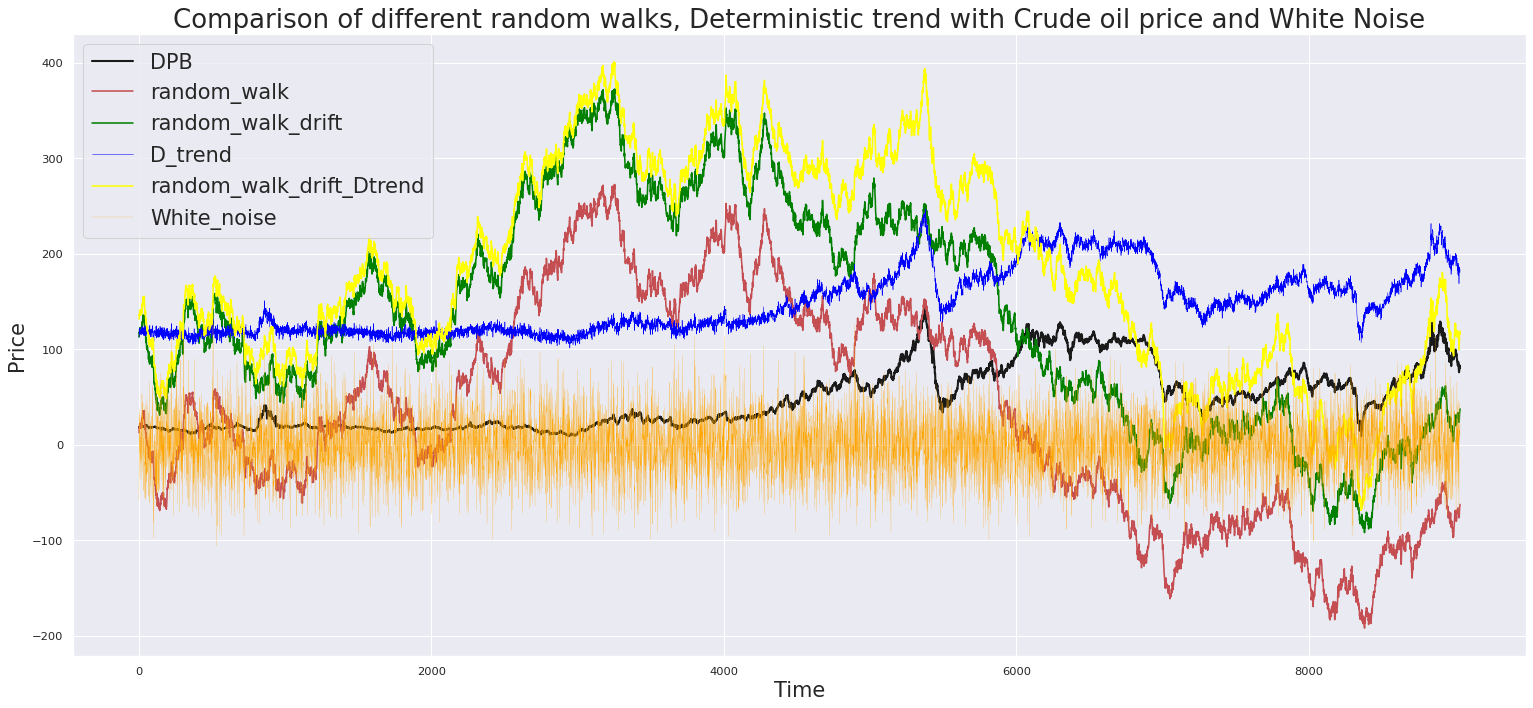

In [ ]:
rand_walk = pd.DataFrame(df2['DPB'])
rand_walk['random_walk'] = rw
rand_walk['random_walk_drift'] = rw_drift
rand_walk['D_trend'] = Dtrnd
rand_walk['random_walk_drift_Dtrend'] = rw_drift_Dtrnd
rand_walk['White_noise'] = wn
fig = plt.figure(figsize=(25,11))

rand_walk['DPB'].plot(color = 'k', linewidth=2)
rand_walk['random_walk'].plot(color = 'r')
rand_walk['random_walk_drift'].plot(color = 'green')
rand_walk['D_trend'].plot(color = 'blue', linewidth=0.5)
rand_walk['random_walk_drift_Dtrend'].plot(color = 'yellow')
rand_walk['White_noise'].plot(color = 'orange', linewidth=0.2)

plt.title('Comparison of different random walks, Deterministic trend with Crude oil price and White Noise', fontsize=25)
plt.xlabel('Time',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.legend(fontsize = 20)
plt.show()

**Black** = The Original Price Values


**Red** = The random walk having the white noise with zero mean keeps it fluctiating around zero line, without showing any trend.


**Green** =The Random walk is shifted with a definite drift.


**Blue** =It has got the trend of the original price values, but having a noise component, thus the jumps between periods are unpredictable.

**Yellow** = Combination of all the features.

**Orange** = the only stationary process.

## checking if data is stationarity or not 







In [ ]:
#test stationarity with Dickey-Fuller test
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [ ]:
#plot time series
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

Results of Dickey-Fuller Test:
Test Statistic                   -2.122381
p-value                           0.235611
#Lags Used                       29.000000
Number of Observations Used    9004.000000
Critical Value (1%)              -3.431076
Critical Value (5%)              -2.861861
Critical Value (10%)             -2.566941
dtype: float64


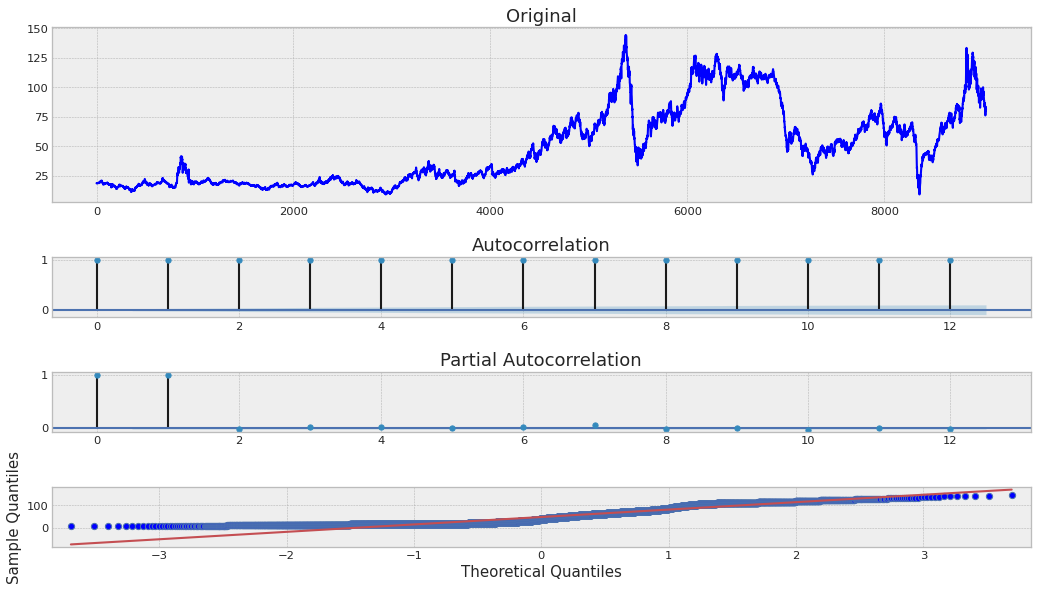

In [ ]:
tsplot(dataset['Price'], lags = 12)

P-value is big and we can see that residuals aren't normally distributed. On the autocorrelation plot values are not in the confidence area.

Now let's fix our series.

#  Making a time series stationary

### **Boxcox Transformation**

In [ ]:
data

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9029,2022-12-13,80.14
9030,2022-12-14,83.33
9031,2022-12-15,82.34
9032,2022-12-16,80.20


In [ ]:
data.set_index("Date", inplace=True)

In [ ]:
series_copy = deepcopy(data['Price'])
series_boxcox = boxcox(series_copy, 0.1)
series_boxcox_diff = np.diff(series_boxcox)

In [ ]:
from statsmodels.tsa.stattools import kpss
def print_kpss_test(timeseries):
    # Perform the KPSS test
    result = kpss(timeseries)
    
    # Extract the test statistic and p-value
    test_statistic = result[0]
    p_value = result[1]
    
    # Extract the critical values at the 1%, 5%, and 10% levels
    critical_values = result[3]
    critical_value_1 = critical_values['1%']
    critical_value_5 = critical_values['5%']
    critical_value_10 = critical_values['10%']
    
    # Print the results in a table
    print('Test Statistic:', test_statistic)
    print('P-Value:', p_value)
    print('Critical Value 1%:', critical_value_1)
    print('Critical Value 5%:', critical_value_5)
    print('Critical Value 10%:', critical_value_10)
print_kpss_test(series_boxcox_diff)

Test Statistic: 0.03158236266826558
P-Value: 0.1
Critical Value 1%: 0.739
Critical Value 5%: 0.463
Critical Value 10%: 0.347


the p-value of the KPSS test is 0.1, which is above the threshold of 0.05. This indicates that the **data is stationary.**

In [ ]:
def print_adf_test(timeseries):
    # Perform the ADF test
    result = adfuller(timeseries)
    
    # Extract the test statistic and p-value
    test_statistic = result[0]
    p_value = result[1]
    
    # Extract the critical values at the 1%, 5%, and 10% levels
    critical_values = result[4]
    critical_value_1 = critical_values['1%']
    critical_value_5 = critical_values['5%']
    critical_value_10 = critical_values['10%']
    
    # Print the results in a table
    print('Test Statistic:', test_statistic)
    print('P-Value:', p_value)
    print('Critical Value 1%:', critical_value_1)
    print('Critical Value 5%:', critical_value_5)
    print('Critical Value 10%:', critical_value_10)
print_adf_test(series_boxcox_diff)

Test Statistic: -16.33608819474561
P-Value: 3.0277158069146056e-29
Critical Value 1%: -3.431076473263252
Critical Value 5%: -2.861861054057012
Critical Value 10%: -2.5669408920449195


the p-value of the ADF test is 3.028e-29, which is significantly below the threshold of 0.05. This indicates that the **data is stationary.**

## Models:

### 1)HMM-Hidden Markov Model with Gaussian emissions

In [ ]:
def prepareData(data, lag_start=5, lag_end=20, test_index=8000):
    data = pd.DataFrame(data.copy())
    
    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data['Price'].shift(i)
        
    data = data.dropna()
    data = data.reset_index(drop=True)
    
    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.iloc[:test_index].drop('Price', axis = 1)
    y_train = data.iloc[:test_index]['Price']
    X_test = data.iloc[test_index:].drop('Price', axis = 1)
    y_test = data.iloc[test_index:]['Price']
    
    return X_train, X_test, y_train, y_test

In [ ]:
series_original = dataset['Price']
values = series_original.values.reshape(-1,1)

Split data onto train and test samples

In [ ]:
N = 8000
train = values[:N]
test = values[N:]

In [ ]:
def get_best_params():
    scores = []
    for n in tqdm(range(15, 35)):
        model = GaussianHMM(n_components=n, covariance_type="diag", n_iter=10000)
        model.fit(values)
        scores.append(model.score(train))
    max_value = max(scores)
    return scores.index(max_value) + 15

In [ ]:
model_hmm = GaussianHMM(n_components=34, covariance_type="diag", algorithm = 'map', n_iter=10000, random_state = 42)

In [ ]:
model_hmm.fit(train)

GaussianHMM(algorithm='map', n_components=34, n_iter=10000, random_state=42)

In [ ]:
train

array([[18.63],
       [18.45],
       [18.55],
       ...,
       [64.14],
       [61.5 ],
       [61.65]])

In [ ]:
prediction_hmm = model_hmm.predict(test)

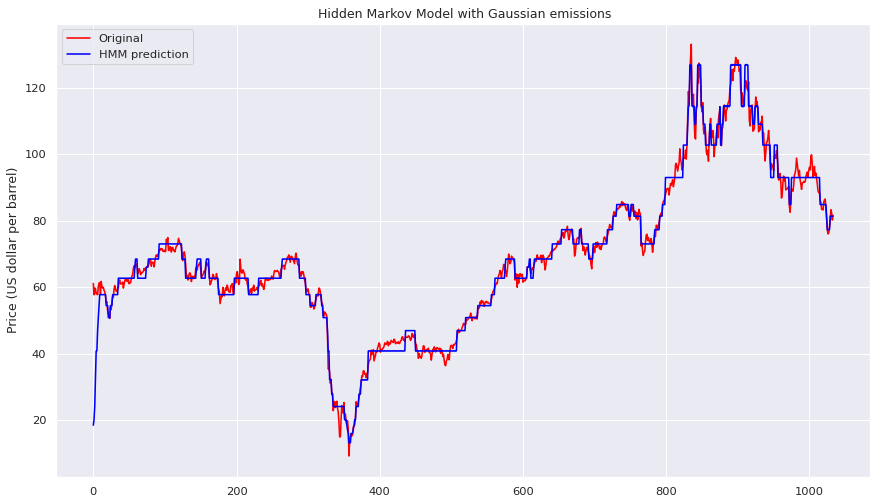

In [ ]:
labels = model_hmm.predict(test)
means = np.zeros_like(test)
for i in range(model_hmm.n_components):
    means[labels == i] = model_hmm.means_[i]
    
plt.figure(figsize=(14, 8))
plt.title(' Hidden Markov Model with Gaussian emissions')
plt.ylabel('Price (US dollar per barrel)')
plt.plot(test, color = 'red', label = 'Original')
plt.plot(means, color = 'blue', label = 'HMM prediction')
plt.legend()
plt.show()

Evaluating prediction

In [ ]:
rmse_hmm = mean_squared_error(test, prediction_hmm) ** (1 / 2)
rmse_hmm

59.68970280693215

In [ ]:
mae_hmm = mean_absolute_error(test, prediction_hmm)
mae_hmm

55.32058994197292

# 2)LSTM-Long short term memory

In [ ]:
dataset = pd.read_csv("/content/data11.csv", parse_dates=['Date'], infer_datetime_format = True)
dataset.rename(columns={'Europe Brent Spot Price FOB (Dollars per Barrel)': 'Price'}, inplace=True)
dataset['Date']=pd.to_datetime(dataset['Date'])
dataset.set_index("Date", inplace=True)
d1=data=dataset

In [ ]:
data

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2022-12-13,80.14
2022-12-14,83.33
2022-12-15,82.34


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
price = data[['Price']]

# Splitting for training and testing:


sequence_length = 22 
test_percentail = 0.05 

data = price.to_numpy()
#Normalizer:
scaler= MinMaxScaler()
scaler.fit(data)
norm = scaler.transform(data)

In [ ]:
dataa = []
for i in range(len(norm) - sequence_length):
  dataa.append(norm[i:i+sequence_length])

dataa = np.array(dataa);
test_set_size = int(np.round(test_percentail*dataa.shape[0]));
train_set_size = dataa.shape[0] - (test_set_size);
#print(f'test size: {test_set_size}, train size: {train_set_size}')
#>> test size: 427, train size: 8122

i_train = dataa[:train_set_size,:-1,:]

o_train = dataa[:train_set_size,-1,:]

i_test = dataa[train_set_size:,:-1]

o_test = dataa[train_set_size:,-1,:]

In [ ]:
#Normalizer:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
scaler.fit(data)
norm = scaler.transform(data)

In [ ]:
# Model building
# Models Parameters
import torch
import torch.nn as nn
import time

i_train_tensor = torch.from_numpy(i_train).type(torch.Tensor)
i_test_tensor = torch.from_numpy(i_test).type(torch.Tensor)
o_train_tensor = torch.from_numpy(o_train).type(torch.Tensor)
o_test_tensor = torch.from_numpy(o_test).type(torch.Tensor)

input_dim = 1   # Lista de {sequence_length-1}
hidden_dim = 22 # Memoria interna das RNN/RNR
num_layers = 2  # 
output_dim = 1  # 1 Lista de 1 elemento
num_epochs = 100

learn_rate = 0.01

In [ ]:
class LSTM(nn.Module):
  def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
    super(LSTM, self).__init__()
    self.hidden_dim = hidden_dim
    self.num_layers = num_layers        
    self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
    self.fc = nn.Linear(hidden_dim, output_dim)
    
  def forward(self, x):
    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
    c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
    out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
    out = self.fc(out[:, -1, :]) 
    return out
model_LSTM = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
#criterion = torch.nn.MSELoss(reduction='sum')
#criterion = torch.nn.L1Loss()
optimiser = torch.optim.Adam(model_LSTM.parameters(), lr=learn_rate)
#optimiser = torch.optim.Adagrad(model_LSTM.parameters(), lr=learn_rate)
#optimiser = torch.optim.AdamW(model_LSTM.parameters(), lr=learn_rate)

hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []

for t in range(num_epochs):
  o_train_pred = model_LSTM(i_train_tensor)
  loss = criterion(o_train_pred, o_train_tensor)
  #print("Epoch ", t+1, "Loss: ", loss.item())
  hist[t] = loss.item()
  optimiser.zero_grad()
  loss.backward()
  optimiser.step()
training_time = time.time()-start_time
print(f'Training time: {training_time}')

Training time: 70.52410173416138


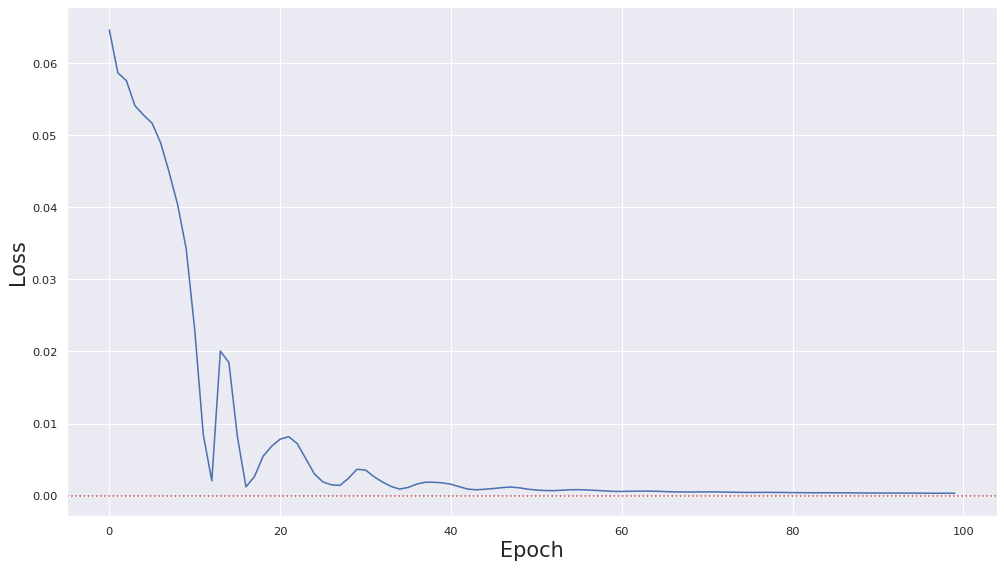

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(hist)
plt.axhline(linestyle='dotted', color='r')
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Loss', fontsize=20)

plt.show()

In [ ]:
#Results:

train_score1 = criterion(model_LSTM(i_train_tensor).detach(), o_train_tensor)
test_score1 = criterion(model_LSTM(i_test_tensor).detach(), o_test_tensor)

print('Parametros: ',
          f'\n  Arquiteture {model_LSTM}',
          f'\n  Input lookback length: {sequence_length-1}',
          f'\n  Learning Rate: {learn_rate}',
          f'\n  Training/Testing Relation: {(1-test_percentail)*100}%/{100*test_percentail}%',
          f'\n  Loss function: {criterion}')


print('\nResultados',
      f'\n  Training time: {training_time:.2f} seconds',
      f'\n  Training Loss: {train_score1.item()}',
      f'\n  Test Loss: {test_score1.item()}')

Parametros:  
  Arquiteture LSTM(
  (lstm): LSTM(1, 22, num_layers=2, batch_first=True)
  (fc): Linear(in_features=22, out_features=1, bias=True)
) 
  Input lookback length: 21 
  Learning Rate: 0.01 
  Training/Testing Relation: 95.0%/5.0% 
  Loss function: MSELoss()

Resultados 
  Training time: 70.52 seconds 
  Training Loss: 0.0003168488619849086 
  Test Loss: 0.0010630154283717275


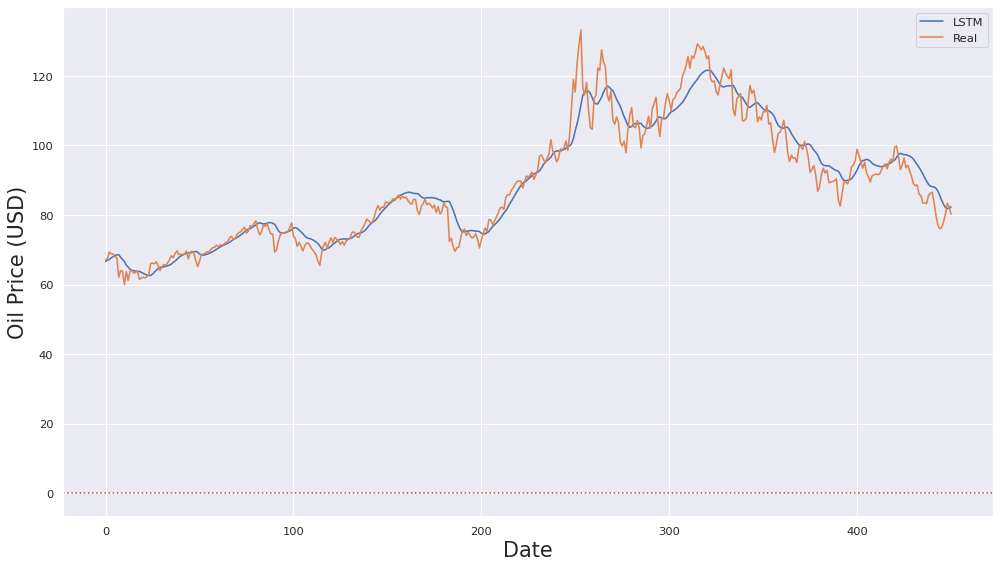

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(scaler.inverse_transform(model_LSTM(i_test_tensor).detach().numpy()))
plt.plot(scaler.inverse_transform(o_test))
plt.axhline(linestyle='dotted', color='r')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Oil Price (USD)', fontsize=20)
plt.legend(['LSTM', 'Real'])

plt.show()

In [ ]:
rmse_LSTM = mean_squared_error(scaler.inverse_transform(model_LSTM(i_test_tensor).detach().numpy()),scaler.inverse_transform(o_test)) ** (1 / 2)
rmse_LSTM 

4.396638880252456

In [ ]:
mae_GRU = mean_absolute_error(scaler.inverse_transform(model_LSTM(i_test_tensor).detach().numpy()),scaler.inverse_transform(o_test))
mae_GRU

3.0921926281034544

# 3)GRU-The Gated Recurrent Unit

In [ ]:
# GRU:

class GRU(nn.Module):
  def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
    super(GRU, self).__init__()
    self.hidden_dim = hidden_dim
    self.num_layers = num_layers       
    self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
    self.fc = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
    out, (hn) = self.gru(x, (h0.detach()))
    out = self.fc(out[:, -1, :]) 
    return out

model_GRU = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
#criterion = torch.nn.MSELoss(reduction='sum')
#criterion = torch.nn.L1Loss()
optimiser = torch.optim.Adam(model_GRU.parameters(), lr=learn_rate)
#optimiser = torch.optim.Adagrad(model_GRU.parameters(), lr=learn_rate)
#optimiser = torch.optim.AdamW(model_GRU.parameters(), lr=learn_rate)

hist2 = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
  o_train_out = model_GRU(i_train_tensor)
  loss = criterion(o_train_out, o_train_tensor)
  #print("Epoch ", t+1, "Loss: ", loss.item())
  hist2[t] = loss.item()
  optimiser.zero_grad()
  loss.backward()
  optimiser.step()
training_time_GRU = time.time()-start_time    
print(f'Training time: {training_time_GRU}')

Training time: 52.73346543312073


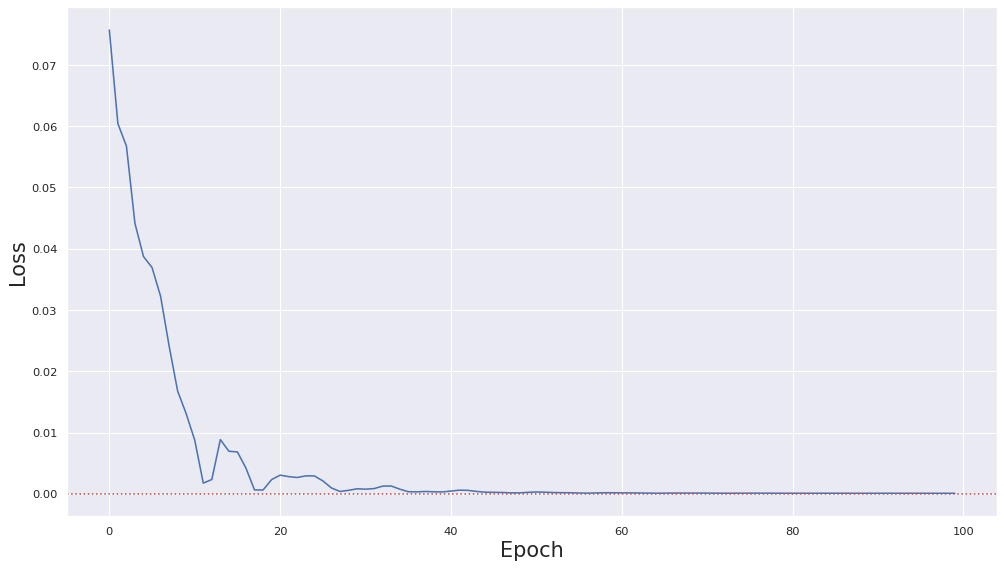

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(hist2)
plt.axhline(linestyle='dotted', color='r')
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Loss', fontsize=20)

plt.show()

In [ ]:
train_score2 = criterion(model_GRU(i_train_tensor).detach(), o_train_tensor)
test_score2 = criterion(model_GRU(i_test_tensor).detach(), o_test_tensor)


print('Parametros: ',
          f'\n  Arquiteture {model_GRU}',
          f'\n  Input lookback length: {sequence_length-1}',
          f'\n  Learning Rate: {learn_rate}',
          f'\n  Training/Testing Relation: {(1-test_percentail)*100}%/{100*test_percentail}%',
          f'\n  Loss function: {criterion}')


print('\nResultados',
      f'\n  Training time: {training_time_GRU:.2f}  seconds',
      f'\n  Training Loss: {train_score2.item()}',
      f'\n  Test Loss: {test_score2.item()}')

Parametros:  
  Arquiteture GRU(
  (gru): GRU(1, 22, num_layers=2, batch_first=True)
  (fc): Linear(in_features=22, out_features=1, bias=True)
) 
  Input lookback length: 21 
  Learning Rate: 0.01 
  Training/Testing Relation: 95.0%/5.0% 
  Loss function: MSELoss()

Resultados 
  Training time: 52.73  seconds 
  Training Loss: 8.469124441035092e-05 
  Test Loss: 0.00042192399268969893


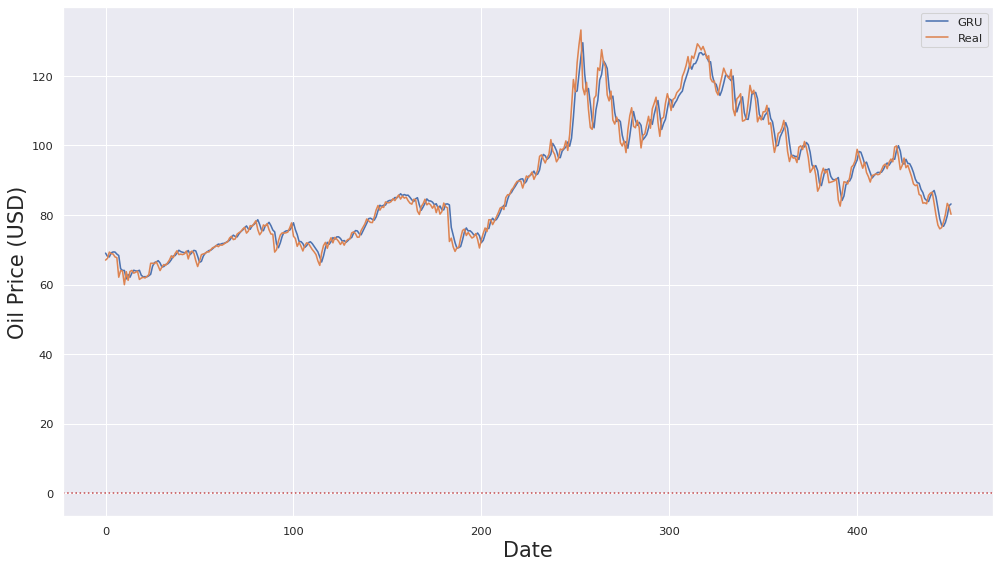

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(scaler.inverse_transform(model_GRU(i_test_tensor).detach().numpy()))
plt.plot(scaler.inverse_transform(o_test))
plt.axhline(linestyle='dotted', color='r')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Oil Price (USD)', fontsize=20)
plt.legend(['GRU', 'Real'])

plt.show()

In [ ]:
rmse_GRU = mean_squared_error(scaler.inverse_transform(model_GRU(i_test_tensor).detach().numpy()), scaler.inverse_transform(o_test)) ** (1 / 2)
rmse_GRU

2.7699257048973185

In [ ]:
mae_GRU = mean_absolute_error(scaler.inverse_transform(model_GRU(i_test_tensor).detach().numpy()), scaler.inverse_transform(o_test))
mae_GRU

1.9534052065153606

In [ ]:
newdata=pd.Series([90,100])
data_pred=pd.DataFrame(newdata,columns=['Price'])

In [ ]:
scaler.inverse_transform(data_pred)

array([[12145.6],
       [13494.1]])

In [ ]:
data

array([[18.63],
       [18.45],
       [18.55],
       ...,
       [82.34],
       [80.2 ],
       [81.66]])

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot

In [ ]:
dataset = pd.read_csv("/content/data11.csv", parse_dates=['Date'], infer_datetime_format = True)
dataset.rename(columns={'Europe Brent Spot Price FOB (Dollars per Barrel)': 'Price'}, inplace=True)

In [ ]:
dataset.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)
train_data = dataset.sample(frac=0.8, random_state=10)

In [ ]:
validation_data = dataset.drop(train_data.index)

print(f'training data size : {train_data.shape}')
print(f'validation data size : {validation_data.shape}')

train_data = train_data.reset_index()
validation_data = validation_data.reset_index()

training data size : (7227, 2)
validation data size : (1807, 2)


In [ ]:
!pip install prophet

import prophet
from sklearn.metrics import mean_absolute_error


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pystan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#pip install fbprophet
from sklearn.metrics import mean_absolute_error


In [ ]:
!pip install pystan cython numpy pandas matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet

In [ ]:
model = Prophet()
model.fit(train_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp07nqyu38/dncvk5y7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp07nqyu38/4nb1ks62.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8523', 'data', 'file=/tmp/tmp07nqyu38/dncvk5y7.json', 'init=/tmp/tmp07nqyu38/4nb1ks62.json', 'output', 'file=/tmp/tmp07nqyu38/prophet_modelexh450j9/prophet_model-20230117080723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:07:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:07:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
prediction = model.predict(pd.DataFrame({'ds':validation_data['ds']}))
y_actual = validation_data['y']
y_predicted = prediction['yhat']
y_predicted = y_predicted.astype(int)
mean_absolute_error(y_actual, y_predicted)

7.009164360819038

In [ ]:
import plotly.graph_objects as go

In [ ]:
from plotly.subplots import make_subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=validation_data['ds'], y=y_actual, name="actual targets"),
    secondary_y=False,)
fig.add_trace(
    go.Scatter(x=validation_data['ds'], y=y_predicted, name="predicted targets"),
    secondary_y=True,)
fig.update_layout(
    title_text="Actual vs Predicted Targets")
fig.update_xaxes(title_text="Timeline")
fig.update_yaxes(title_text="actual targets", secondary_y=False)
fig.update_yaxes(title_text="predicted targets", secondary_y=True)
fig.show()

In [ ]:
rmse_prophet = mean_squared_error(y_actual, y_predicted) ** (1 / 2)
rmse_prophet

11.297458260304904

In [ ]:
mae_prophet = mean_absolute_error(y_actual, y_predicted)
mae_prophet

7.009164360819038

In [ ]:
import pandas as pd

data = {'date': [ '2022-12-20', '2022-12-30', '2023-01-01', '2023-01-02','2023-01-03']}

df = pd.DataFrame(data)

print(df)

         date
0  2022-12-20
1  2022-12-30
2  2023-01-01
3  2023-01-02
4  2023-01-03


In [ ]:
def dataPreprocessing(dataFrame):
    dataFrame['date'] = pd.to_datetime(dataFrame['date'])
    
    return dataFrame

In [ ]:
test_data = df
print(f'test dataset size : {test_data.shape}')
testing_data = dataPreprocessing(test_data.copy())
testing_data.head()

test dataset size : (5, 1)


,date
0,2022-12-20
1,2022-12-30
2,2023-01-01
3,2023-01-02
4,2023-01-03


In [ ]:
test_prediction = model.predict(pd.DataFrame({'ds':testing_data['date']}))

In [ ]:
test_prediction = test_prediction['yhat']
test_prediction = test_prediction.astype(int)
test_data['Price'] = test_prediction
test_data.head()
test_data.to_csv('submission.csv', index=False)

## **Conclusion**

In [ ]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Model", "RMSE", "MSE"]
table.add_row([f"HMM",59.68, 55.32])
table.add_row([f"GRU",2.78,1.95])
table.add_row([f"LSTM",4.01,2.77])
table.add_row([f"FBP",11.29,7.00])
# Print the table
print(table)

+-------+-------+-------+
| Model |  RMSE |  MSE  |
+-------+-------+-------+
|  HMM  | 59.68 | 55.32 |
|  GRU  |  2.78 |  1.95 |
|  LSTM |  4.01 |  2.77 |
|  FBP  | 11.29 |  7.0  |
+-------+-------+-------+
